# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     981.4
Date:                Tue, 02 Jan 2024   Prob (F-statistic):           1.10e-41
Time:                        11:51:53   Log-Likelihood:                0.20548
No. Observations:                  50   AIC:                             7.589
Df Residuals:                      46   BIC:                             15.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7951      0.086     55.997      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.2704079   4.78718163  5.26065297  5.66047822  5.96726454  6.17575619
  6.29569798  6.35023428  6.37210643  6.39827344  6.46383972  6.59628756
  6.81096181  7.10854882  7.47496363  7.88366414  8.30001183  8.68696285
  9.01115417  9.24838503  9.38759309  9.4326719   9.40183126  9.32460531
  9.23700025  9.17557856  9.17145193  9.24516964  9.40334244  9.63755639
  9.92575522 10.23586416 10.53105971 10.77581965 10.94175921 11.01229464
 10.98536786 10.8737846  10.70311044 10.5074705  10.32394271 10.18646608
 10.12026457 10.1377029  10.23625503 10.39891919 10.59701125 10.79487739
 10.95575197 11.047798  ]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.03610044 10.87802311 10.59540061 10.23799121  9.87129427  9.56051377
  9.35459405  9.27423655  9.30683138  9.40954465]


## Plot comparison

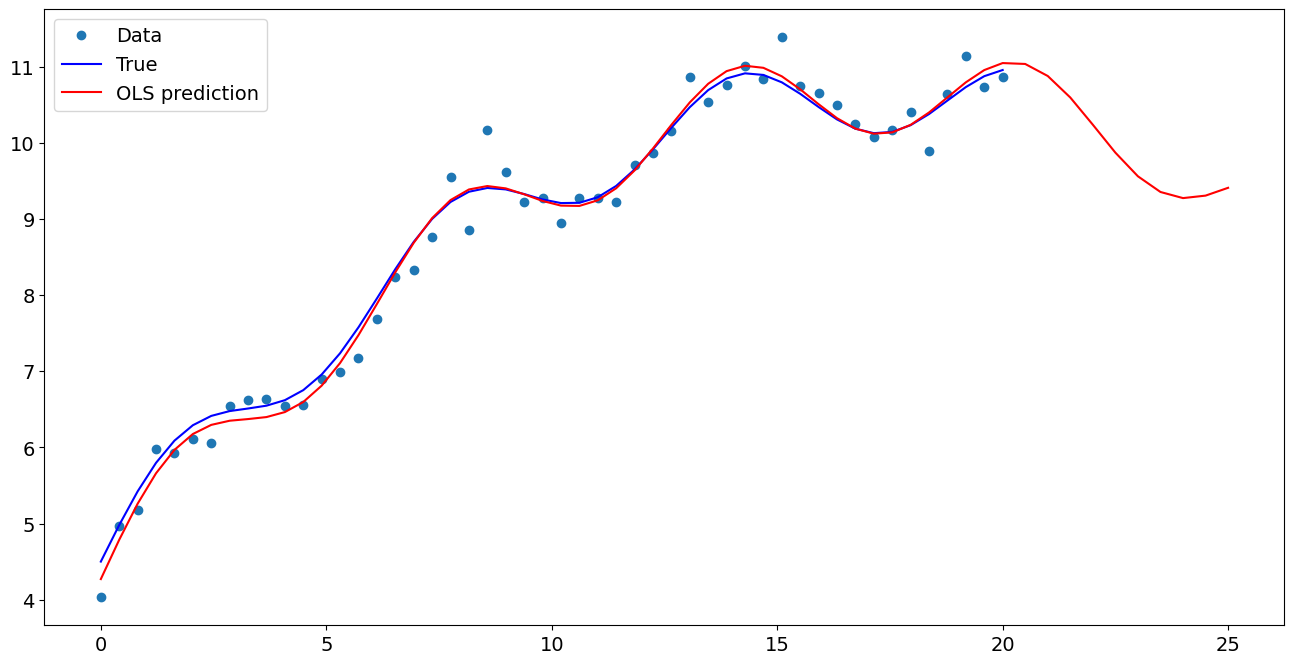

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.795114
x1                  0.523337
np.sin(x1)          0.556774
I((x1 - 5) ** 2)   -0.020988
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.036100
1    10.878023
2    10.595401
3    10.237991
4     9.871294
5     9.560514
6     9.354594
7     9.274237
8     9.306831
9     9.409545
dtype: float64